In [216]:
# Notebook Summary

# This notebook performs the following:
# - Analysizes traffic or "Rollerskating", "Rollerskates", and "Rollerblading" Traffic
# - Comparision of "Rollerblade" and "Rollerskate" Sports
# - Analysis COVID usage in each keyword

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import dateutil

In [4]:
# Read 2020 "Rollerskates" Scrapped Data
data = "..//scraped_tweets/2020_rollerskates_snscrape_tweets.csv"
rollerskates = pd.read_csv(data)
rollerskates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25778 entries, 0 to 25777
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   datetime  25778 non-null  object
 1   tweet_id  25778 non-null  int64 
 2   text      25778 non-null  object
 3   username  25778 non-null  object
dtypes: int64(1), object(3)
memory usage: 805.7+ KB


In [113]:
# Read 2020 "Rollerskating" Scrapped Data
data = "..//scraped_tweets/2020_snscrape_tweets.csv"
rollerskating = pd.read_csv(data)
rollerskating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28985 entries, 0 to 28984
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   datetime  28985 non-null  object
 1   tweet_id  28985 non-null  int64 
 2   text      28985 non-null  object
 3   username  28985 non-null  object
dtypes: int64(1), object(3)
memory usage: 905.9+ KB


In [114]:
# Get Sum of RollerSkate Tweets Per Month
df = pd.DataFrame()
df['datetime'] = rollerskates['datetime']
# Covert Pandas core series to type datetime 
df['datetime']= pd.to_datetime(df['datetime'])
# Convert datetime using dt to year
df['datetime']= df['datetime'].dt.month
# add new col to count for tweet per row
df['tweetcount'] = 1

rollerskatingAgg = pd.pivot_table(data=df, index='datetime',
               values='tweetcount',
               aggfunc='sum').reset_index().rename(columns={'tweetcount':'tweetsperday'})

print(rollerskatingAgg)
rollerskatesAgg.to_csv("rsSum20.csv")

    datetime  tweetsperday
0          1           830
1          2           807
2          3          1032
3          4          1686
4          5          3635
5          6          2321
6          7          3095
7          8          3858
8          9          2072
9         10          3586
10        11          2661
11        12           195


In [9]:
# Get Sum of RollerSkating Tweets Per Month
df2 = pd.DataFrame()
df2['datetime'] = rollerskating['datetime']
# Covert Pandas core series to type datetime 
df2['datetime']= pd.to_datetime(df2['datetime'])
# Convert datetime using dt to year
df2['datetime']= df2['datetime'].dt.month
# add new col to count for tweet per row
df2['tweetcount'] = 1

rollerskatesAgg = pd.pivot_table(data=df2, index='datetime',
               values='tweetcount',
               aggfunc='sum').reset_index().rename(columns={'tweetcount':'tweetsperday'})

print(rollerskatesAgg)

    datetime  tweetsperday
0          1          1456
1          2          1410
2          3          1481
3          4          1559
4          5          3087
5          6          2105
6          7          3461
7          8          3815
8          9          2446
9         10          5820
10        11          2061
11        12           284


In [146]:
# Read 2020 "Rollerblades" Scrapped Data
data = "..//scraped_tweets/2020_rollerbladessnscrape_tweets.csv"
rollerblades = pd.read_csv(data)
rollerblades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29421 entries, 0 to 29420
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   datetime  29421 non-null  object
 1   tweet_id  29421 non-null  int64 
 2   text      29421 non-null  object
 3   username  29421 non-null  object
dtypes: int64(1), object(3)
memory usage: 919.5+ KB


In [147]:
# Get Sum of RollerBlade Tweets Per Month
df = pd.DataFrame()
df['datetime'] = rollerblades['datetime']
# Covert Pandas core series to type datetime 
df['datetime']= pd.to_datetime(df['datetime'])
# Convert datetime using dt to year
df['datetime']= df['datetime'].dt.month
# add new col to count for tweet per row
df['tweetcount'] = 1

rollerbladeAgg = pd.pivot_table(data=df, index='datetime',
               values='tweetcount',
               aggfunc='sum').reset_index().rename(columns={'tweetcount':'tweetsperday'})

print(rollerbladeAgg)
# rollerskatesAgg.to_csv("rsSum20.csv")

    datetime  tweetsperday
0          1          1199
1          2          1139
2          3          2202
3          4          4103
4          5          4710
5          6          2894
6          7          3356
7          8          3063
8          9          2323
9         10          2348
10        11          1982
11        12           102


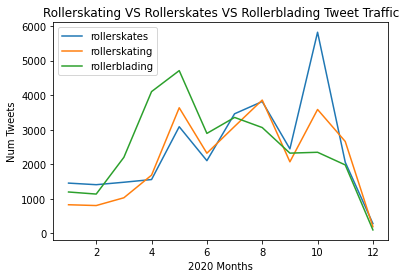

In [214]:
# Plot Tweets Per Month for Rollerskating, Rollerskates, and Rollerblades

x = rollerskatesAgg['datetime']
y = rollerskatesAgg['tweetsperday']
x1 = rollerskatingAgg['datetime']
y1 = rollerskatingAgg['tweetsperday']
x2 = rollerbladeAgg['datetime']
y2 = rollerbladeAgg['tweetsperday']


fig, axs = plt.subplots(1,1)
axs.plot(x,y, label = 'rollerskates')
axs.plot(x1,y1, label = 'rollerskating')
axs.plot(x2,y2, label = 'rollerblading')
axs.set_xlabel('2020 Months')
axs.set_ylabel('Num Tweets')
axs.set_title("Rollerskating VS Rollerskates VS Rollerblading Tweet Traffic")
axs.legend()

plt.show()

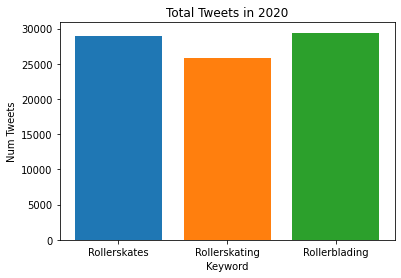

84184


In [156]:
# Plot Total Num of Tweets for Rollerskating VS Rollerskates
sumSkate = sum(rollerskatesAgg['tweetsperday'])
sumSkating = sum(rollerskatingAgg['tweetsperday'])
sumBlading = sum(rollerbladeAgg['tweetsperday'])

plt.bar(0, sumSkate)
plt.bar(1, sumSkating)
plt.bar(2, sumBlading)
plt.xticks((0,1,2), ('Rollerskates', 'Rollerskating', 'Rollerblading'))
plt.title('Total Tweets in 2020')
plt.xlabel('Keyword')
plt.ylabel('Num Tweets')
plt.show()

totalSum = sumSkate + sumSkating + sumBlading
print(totalSum)

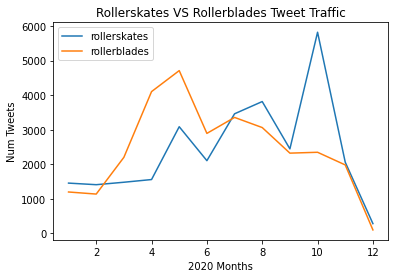

In [151]:
# Plot Tweets Per Month for Rollerskating and Rollerskates

x = rollerskatesAgg['datetime']
y = rollerskatesAgg['tweetsperday']
x2 = rollerbladeAgg['datetime']
y2 = rollerbladeAgg['tweetsperday']

fig, axs = plt.subplots(1,1)
axs.plot(x,y, label='rollerskates')
axs.plot(x2,y2, label='rollerblades')
axs.set_xlabel('2020 Months')
axs.set_ylabel('Num Tweets')
plt.legend()
axs.set_title("Rollerskates VS Rollerblades Tweet Traffic")

plt.show()


34
29421


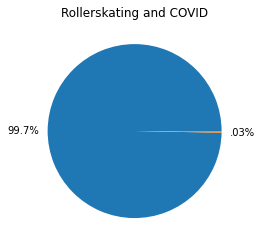

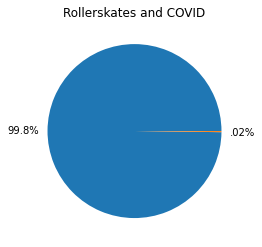

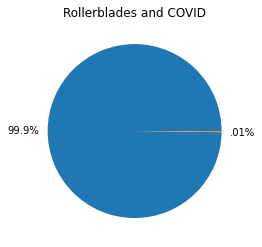

In [213]:
# Find Number of Tweets Containing COVID

textDF = pd.DataFrame(rollerskating['text'])
textDF['datetime'] = rollerskating['datetime']
covidSkatingTweets = []
for tweet in textDF['text']:
    if tweet.find("covid") >= 0:
        covidSkatingTweets.append(tweet)

# print(len(covidSkatingTweets))
# print(len(rollerskating))

textDF2 = pd.DataFrame(rollerskates['text'])
covidSkateTweets = []
for tweet in textDF2['text']:
    if tweet.find("covid") >= 0:
        covidSkateTweets.append(tweet)

# print(len(covidSkateTweets))
# print(len(rollerskates))

textDF3 = pd.DataFrame(rollerblades['text'])
covidSkateTweets = []
for tweet in textDF3['text']:
    if tweet.find("covid") >= 0:
        covidSkateTweets.append(tweet)

print(len(covidSkateTweets))
print(len(rollerblades))

x = [99.7, .3]
y = ['99.7%','.03%']
plt.pie(x, labels = y)
plt.title("Rollerskating and COVID")
plt.show()

x2 = [99.8, .2]
y2 = ['99.8%','.02%']
plt.pie(x2, labels = y2)
plt.title("Rollerskates and COVID")
plt.show()

x3 = [99.9, .2]
y3 = ['99.9%','.01%']
plt.pie(x3, labels = y3)
plt.title("Rollerblades and COVID")
plt.show()

    datetime  tweetsperday
0      01-01            15
1      01-02            19
2      01-03            39
3      01-04            45
4      01-05            33
..       ...           ...
334    11-30            98
335    12-03             1
336    12-04             9
337    12-07           184
338    12-10             1

[339 rows x 2 columns]


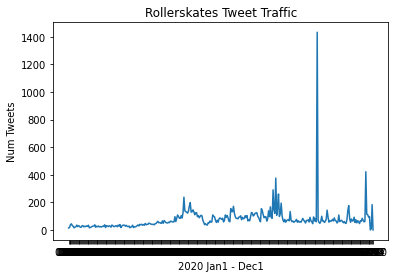

In [206]:
df = pd.DataFrame()
df['datetime'] = rollerskates['datetime']
df['datetime']= pd.to_datetime(df['datetime'])
df['datetime']= df['datetime'].dt.strftime('%m-%d')
df['tweetcount'] = 1
agg = pd.pivot_table(data=df, index='datetime',
               values='tweetcount',
               aggfunc='sum').reset_index().rename(columns={'tweetcount':'tweetsperday'})

print(agg)

fig, ax = plt.subplots()
x=agg['datetime']
y=agg['tweetsperday']
ax.plot(x,y)
ax.set_xlabel('2020 Jan1 - Dec1')
ax.set_ylabel('Num Tweets')
ax.set_title("Rollerskates Tweet Traffic")
plt.show()
